In [4]:
# Week 4- Aprendizaje Supervisado Part II (Unsupervised)

# Naive Bayes Clasificador
# Random Forests - Bosques
# Gradient Boosted Decision Trees
# Neural Networks - Redes Neuronales
# Data Leakage

<IPython.core.display.Javascript object>


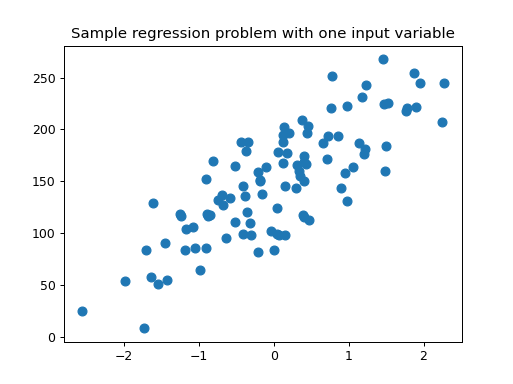

<IPython.core.display.Javascript object>


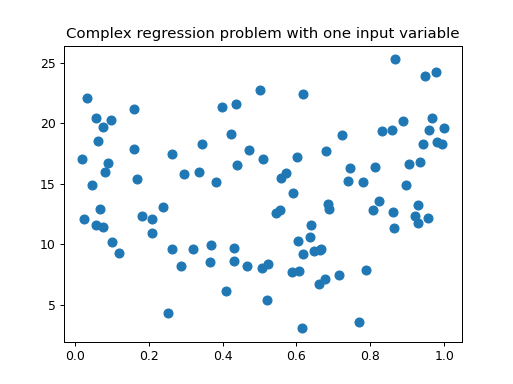

<IPython.core.display.Javascript object>


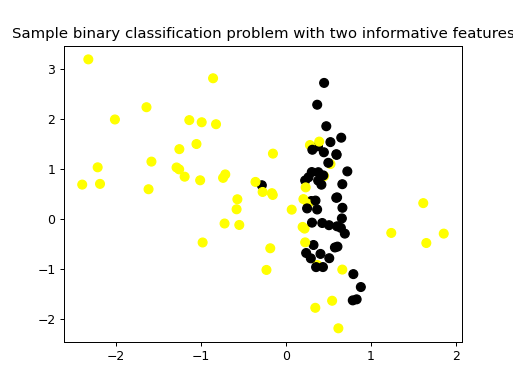

<IPython.core.display.Javascript object>


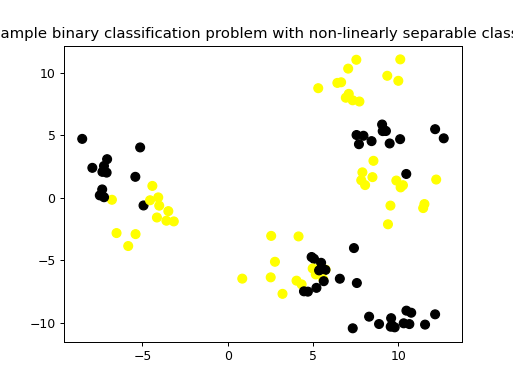

FileNotFoundError: [Errno 2] No such file or directory: 'readonly/CommViolPredUnnormalizedData.txt'

In [5]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

In [ ]:
# Week 4: Naive Bayes Classifiers
# GaussianNB().fit(X_train, y_train)
# plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
#                               'Gaussian Naive Bayes classifier: Dataset 1')

In [ ]:
# assumption that each feature in X_data is independent, no correlation between features
# high efficient fit/train and prediction
# generalization performance can be worse, compared to more complex methods (SVectorMahine)

# Types of Naive Bayes Class:
# Bernoulli: binary features, for text classification
# Multi nomial: discrete features (count features), for text classification
# Gaussian: continuous/real value features, calculate mean and std of each feature, for high dimensional data thousands of features
# 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

# divide source data into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

# create GaussianNB model, default parameters, fit/train with train-set
nbclf = GaussianNB().fit(X_train, y_train)

# plot decision bondaries for classifier
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

In [ ]:
# divide source data into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

# create GaussianNB() model, default parameters, fit/train with train-set 
nbclf = GaussianNB().fit(X_train, y_train)

# plot class regions for the model with train-set and test-set
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 2')

In [ ]:
# divide source data into train-set and test-set with cancer data
# set parameter random_state=0,  75%train-25%test
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

# create model GaussianNB, default parameters, fit/train with train-set
nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

In [ ]:
# Week 4: Random Forests: predice utilizando varios arboles 
# RandomForestClassifier().fit(X_train, y_train):  crear RandomForestClassifier Clasificador, fit/train ajustar utilizando train-set
# RandomForestRegression().fit(X_train, y_train): crear RandomForestRegressor Regresión, fit/train ajustar utilizando train-set
# plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,y_test, title, subaxes):  regiones de decision

In [ ]:
# ensemble: combina varios modelos mejorar la predicción 
# cada modelo ajusta diferente k-folds de la base, al combinar , reduce overfitting del modelo 


# Random forest: varios random trees en paralelo 
# Clasificació: RandomForestClassifier
# Regresión: RandomForestRegressor
# varios arboles: mas estable , mejor generalización 
# introduce variacion  random en construir los modelos


# Random Forest hiper parámetros:
# max_features: importante parámetro muy sensible en el performance, afecta la diversidad de los arboles,
# max_features=1 forest more diverse, more complex trees


# max_features= <cerca al numero de variables ?> similar  a bosque con arboles simples 
# clasificación ,  max_features=sqrt(tot_features)
# regresión,  max_features=log_2(tot_features)

# n_estimador: número de arboles en el bosque (default 10), mayor numero de arboles para bases grandes
#  para reducir overfitting, más arboles es más costoso computacionalmente 

# max_depth: controla al profundidad de cada arbol(default: None divide en ramas hasta que todas las horas son puras (Gini=0) , have 2 classes)
# n_jobs: numero de cores en paralelo para el fit/train  
# random_state: ratio of train-set/test-set(default=0, 75%-25%)


# regression = media mu de cada predicción de arbol  

# clasificacion:
# 1. cada arbol da una probabilidad para cada clase: 
# 2. probabilidades promediadas a través de arboles 
# 3. predecir clase con mayor probabilidad 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

# divide source data into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

# create RandomForestClassifier, default parameters, fit/train with train-set 
clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
# plot class regions for the model
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits,
                                                   y_fruits,
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'

# iterate through pairs of feature columns in data-set
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

# iterate through pairs of feature columns
for pair, axis in zip(pair_list, subaxes):
    
    # get train-set
    X = X_train[:, pair]
    y = y_train
    
    # create RandomForestClassifier, default parameters, fit/train with train-set 
    clf = RandomForestClassifier().fit(X, y)
    # plot class regions
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

# create RandomForestClassifier model, parameters:  n_estimators=10, random_state=0, fit/train with train-set
clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# divide source data into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

# create RandomForestClassifier, parameters:  max_features = 8, random_state = 0
clf = RandomForestClassifier(max_features = 8, random_state = 0)
# fit/train model with train-set
clf.fit(X_train, y_train)

# get evaluation metrics of model using train-set and test-set
print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [ ]:
# Week 4: Gradient Boosted Decision Trees predice utilizando varios arboles 
# serie de arboles con tasa de aprendizaje reforzada de la anterior
# 

In [ ]:
# cada arbol trata de corregir los errores del arbol fit/train ajustado anterior  
# learning rate/tasa de aprendizaje: controla el esfuerzo para corregir los errores de anteriores arboles  
# high learning rate  es más complejo more complex, low learning rate  es menos complejo 
# accuracy perfecto en train-set es posible overfitting


# + mejores modelos de ML para metricas de evaluacion (accuracy)
# + requeire poca memoria
# + rápido y eficiente 
# - requiere sintonización cuidadosa de hiper parámetros (learning rate)
# - fit/train requiere mayor costo computacional

# Gradient Boosted Decision Trees parameters:
# n_estimators: número de arboles en el bosque 
# learning_rate: controla el esfuerzo para corregir los errores de anteriores arboles  
# n_estimators: tuned first, larger n_estimators leads to overfitting, explits memory and CPUs during training
#max_depth: set to small value (3-5)  controls depth of each tree (default: None splits until all leaves are pure, have 2 classes)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

# divide source data into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

# create GradientBoostingClassifier model, default parameters, fit/train with train-set
clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT, complex binary dataset, default settings'
# plot class regions of model
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

In [ ]:
# divide source data into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

# create pairs of features from data
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

# iterate through pairs of features
for pair, axis in zip(pair_list, subaxes):
    
    
    X = X_train[:, pair]
    y = y_train
    
    #  create GradientBoostingClassifier, default parameters, fit/train with train-set
    clf = GradientBoostingClassifier().fit(X, y)
    # plot class regions
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# divide source data into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

# create GradientBoostingClassifier, parameters: random_state=0, default parameters: learning_rate=0.1, max_depth=3
clf = GradientBoostingClassifier(random_state = 0)
# fit/train with train-set
clf.fit(X_train, y_train)

# get evaluation metrics: accuracy(score) of model for train-set and test-set
print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

# create GradientBoostingClassifier, parameters: learning_rate = 0.01, max_depth = 2, random_state = 0
# fit/train with train-set
clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

# get evaluation metrics: accuracy(score) of model with train-set and test-set
print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [ ]:
# Week 4: Neural Networks, hidden layer (like logistic regression) with sum weights of non linear functions
# basis of deep learning
# more train-set and computation needed for training


# nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
#                     random_state = 0).fit(X_train, y_train)


#         mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
#                             activation = thisactivation,
#                             alpha = thisalpha,
#                             solver = 'lbfgs').fit(X_train, y_train)


#     plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
#                                            X_test, y_test, title, axis)

In [ ]:
# multi layer preceptrons for classification and regression
# logistic regression takes output of linear regression into a non linear [0-1] binary output
# multi layer perceptron: aditional hidden layer hi with weights vi (hidden units)
# hi each hidden unit calculates non linear function of weighted sum of inputs
# y target function = v0h0 + v1h1 + v2h2
# hi activation function =  tanh(w0ix0 + w1ix1 + w2ix2 ...)
# more layers, more weights coefficients, more complex models

# regularization: control complexity of models by shrinking weight values to zero, smoother models
# larger, more complex models, careful preprocessing of data needed

# Neural Networks PArameters:
# hidden_layers_sizes: number of hidden layer, and number of hidden unit per layer (default 100 hi )
# alpha_reg: controls penalty on large values of L2 ()^2
# activation: controls/set the nonlinear function used for activation function
# relu(default), logistic, tanh

In [ ]:
# set x input value range
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

# plot
plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
# plot tanh activation function
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
# plot logistic function(logistic non linear function)
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

# MLPClassifier model 1 layer, [1,10,100] hi hidden units

# divide source data into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

# iterate through hidden units hi
for units, axis in zip([1, 10, 100], subaxes):
    
    # create MLPClassifier model, parameters: hidden_layer_sizes hi = units(ranges), solver='lbfgs', random_state=0
    # fit/train model with train-set, single layer
    # default hidden_layer_sizes = 1
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    # plot classifier class regions
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()
    
    # for 1 hi hidden units, score 0.64 underfitting

In [ ]:
from adspy_shared_utilities import plot_class_regions_for_classifier

# MLPClassifier model 2 layer, (10,10) hi hidden units

# divide source data into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

# create MLPClassifier model, parameters hidden_layer_sizes = layer1, layer2[10, 10],  solver='lbfgs', random_state = 0
# fit/train model with train-set
nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

# plot classifier class regions
plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

In [ ]:
#  L2 regularization ( SUM()^2 ) in neural networks
# MLPClassifier neural network with 2 layers, 100 hidden units hi each

# divide source data into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

# iterate through alpha range parameters
for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    
    # create MLPClassifier neural network, parameters: solver='lbfgs', activation function = 'tanh'
    # alpha = this_alpha range hidden_layer_sizes 2 layers = [100, 100], random_state = 0
    # fit/train with  train-set
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    # plot classifier class regions
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()
    

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = this_activation,
                         alpha = 0.1, hidden_layer_sizes = [10, 10],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

In [ ]:
from sklearn.neural_network import MLPRegressor

# MLPRegressor Regression with Neural Networks


fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

# divide source data into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

# iterate through activation function parameter
for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    
    # iterate through L2 alpha_reg parameter, punish large wi 
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        
        # create MLPRegressor neural network regression model
        # parameters: hidden_layer_sizes 2 layers = [100,100], activation = thisactivation
        # alpha = thisalpha, solver = 'lbfgs'
        
        # fit/train model with train-set
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        
        # y_predict with mlpreg.predict(X_predict_input)
        y_predict_output = mlpreg.predict(X_predict_input)
        
        # plot
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

# normalize X_data (X_train,X_test) data using MinMaxScaler for Neural Network

# create MinMaxScaler scaler
scaler = MinMaxScaler()

# divide source data into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
# scaler.fit_transform(X_train),  fit/transform scaler using X_train set
X_train_scaled = scaler.fit_transform(X_train)
# scaler.fit_transform(X_train),  fit/transform scaler using X_test set
X_test_scaled = scaler.transform(X_test)

# create MLPClassifier, parameters:  hidden_layer_sizes = [100, 100], alpha = 5.0
# random_state = 0, solver='lbfgs'
# fit/transform using scaled X_train data and y_train
clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

In [ ]:
# Week 4: Deep Learning,

In [ ]:
# feature extraction: get best features inputs X_data for a model
# feature extraction uses hierarchy of multiple extraction layers
# from low-leve features in the initial layer, to high-level layer

In [ ]:
# machine learning: source data, fit//train model with data, predict with test data, score evaluation metrics
# feature engineering: extracting X_data features that make the model easy to distinguish classes, create automatically engineer features
# feature learning: finds common patterns to distinguish classes 
# deep learning: multiple layers -non linear function features with hidden units to make accurate predicitons
# logistic regression: passes output of y target linear regression function (y=w1x1+w2x2+..+b) into a non linear logistic function with outputs [0-1] for binary classification
# neural network: takes source data features, tranforms data by calculating weighted sum of inputs, applies non linear function(unit) for 1 layer. by error signal measure difference between predictions to change weights(parameters) to improve
# hidden unit hi: box activation function that passes input through nonlinear activation functions
# activation function: takes input of weighted data and outputs non linear transformation function data

In [ ]:
# Week 4: Data leakage
# data info in train-set with info about y_test set to predict

In [ ]:
# introducing info features about y_target that would not normaly be (like including the label to predict as a feature, including test-set into train-set)
# models too good, probably have data leakage

# examples of data leakage: 
# y_target: user stays or leaves, feature_leakage: total session lenght
# y_target: user is going to open account,  feature_leakage: account number generated once account is opened
# y_target: medical condition,  feature_leakage: surgery or previous condition, missing diagnosis, patient ID with diagnoses path info

# types of data leakage
# in train-set: using records of the future to compute features of current prediction
# manipulating pre processing data with parameters or results from analyzing the entire data-set
# errors in data or missing variable indicators, reveals info about the future

# in features: removing variables without also removing variables encode the same or relevant info
# reversing randomization or anonymization of info

# 1. before building model, analyse data, look for X_data features highly correlated with y_target value, perform data preparation with each cross-val fold separately for EACH fold, not entire set
# 2. after building model, look for very high weights or high gains. look for unusualy good performance compared to other known models, use cut-off value to specific time point
# 3. real-world, look for train model is generalizing too well,  split off a final test validation dataset